# Green Bay Packers Career Passing Yards Leaders by Year
<img src="Packerlogo.png" align='left' width="200" length="200" />



In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re
%matplotlib inline

In [40]:
#import the file into Python 
passing_yds=pd.read_excel('Packers_Top_PassingYds.xlsx')

In [41]:
passing_yds

,Year,Player,Passing Yards,Years Played
0,2019,Brett Favre,61655,1992-2007
1,2019,Aaron Rodgers,46946,2005-2019
2,2019,Bart Starr,24718,1956-1971
3,2019,Lynn Dickey,21369,1976-1985
4,2019,Tobin Rote,11535,1950-1956
...,...,...,...,...
812,1933,Arnie Herber,1295,1930-1940
813,1933,Bob Monnett,325,1933-1938
814,1933,Clarke Hinkle,170,1932-1941
815,1932,Arnie Herber,639,1930-1940


In [42]:
passing_yds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 4 columns):
Year             817 non-null int64
Player           817 non-null object
Passing Yards    817 non-null int64
Years Played     817 non-null object
dtypes: int64(2), object(2)
memory usage: 25.7+ KB


In [43]:
#sort values in desc order by year and passing yards
passing_yds=passing_yds.sort_values(by=['Year','Passing Yards'], ascending=False)

In [44]:
#variable to set the desired year to show
year=2019

In [45]:
#create new dataframe containing single year as indicated by 'year' variable
passing_yds_year=passing_yds[passing_yds['Year'].eq(year)]

In [46]:
passing_yds_year

,Year,Player,Passing Yards,Years Played
0,2019,Brett Favre,61655,1992-2007
1,2019,Aaron Rodgers,46946,2005-2019
2,2019,Bart Starr,24718,1956-1971
3,2019,Lynn Dickey,21369,1976-1985
4,2019,Tobin Rote,11535,1950-1956
5,2019,Don Majkowski,10870,1987-1992
6,2019,Randy Wright,7106,1984-1988
7,2019,Arnie Herber,6749,1930-1940
8,2019,David Whitehurst,6205,1977-1983
9,2019,Cecil Isbell,5945,1938-1942


Text(0.5, 1.0, 'Top 10 Career Packers Passing Yards Leaders in 2019')

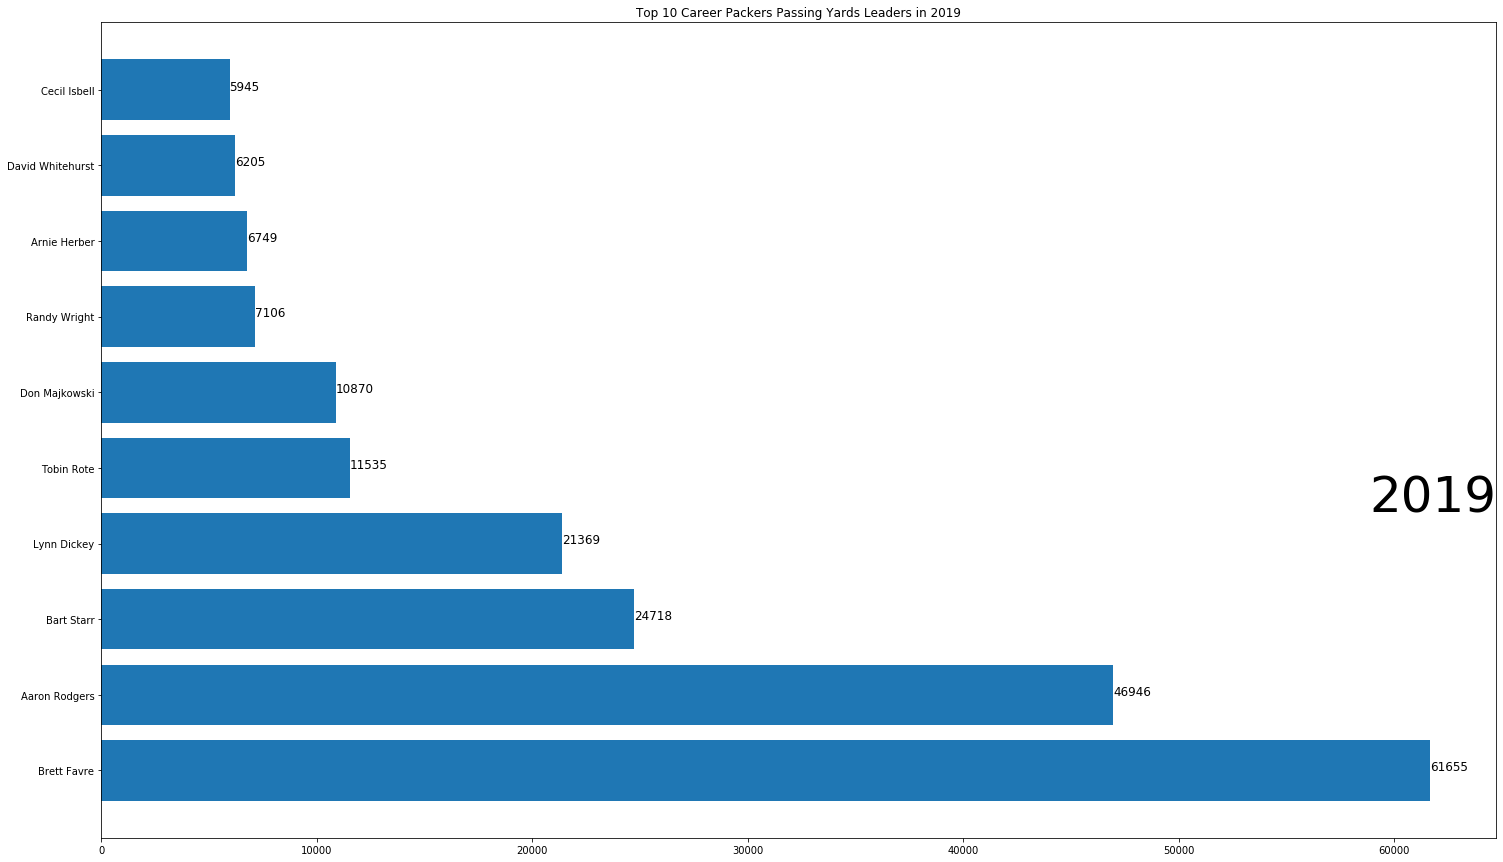

In [47]:
fig, ax = plt.subplots(figsize=(25, 15))
#horizontal bar graph of player and passing yards
ax.barh(passing_yds_year['Player'], passing_yds_year['Passing Yards'])
#loop to put text of yards total after the bar
for i, (total, Player) in enumerate(zip(passing_yds_year['Passing Yards'], passing_yds_year['Player'])):
    ax.text(total, i,   total, ha='left', color = 'black', size = 12)
#Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
ax.set_title('Top 10 Career Packers Passing Yards Leaders in' + ' ' + str(year))

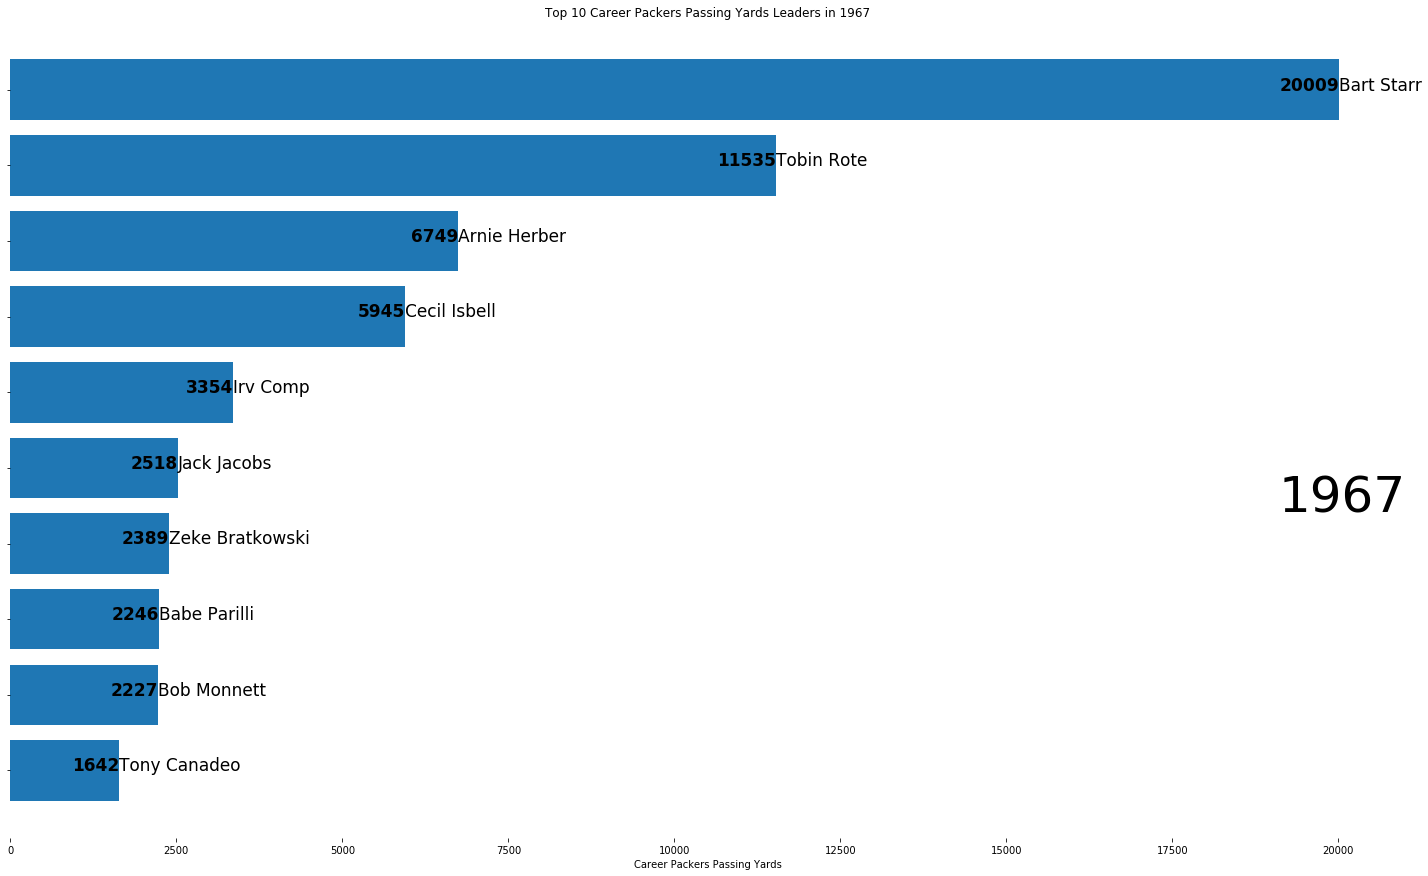

In [48]:
fig, ax = plt.subplots(figsize=(25, 15))
#create function to draw bar chart and pass year variable as argument
def draw_barchart(year):
    passing_yds_year=passing_yds[passing_yds['Year'].eq(year)]
    #put highest value on top
    passing_yds_year = passing_yds_year[::-1]
    ax.clear()
    #horizontal bar graph of player and yards
    ax.barh(passing_yds_year['Player'], passing_yds_year['Passing Yards'])
    #loop to put text of player after the bar and yards in the bar
    for i, (total, Player) in enumerate(zip(passing_yds_year['Passing Yards'], passing_yds_year['Player'])):
        ax.text(total, i,   total, ha='right', color = 'black', weight=600, size = 17)
        ax.text(total, i,   Player, ha='left', color = 'black', size = 17)
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=50, ha='right')
    ax.set_xlabel('Career Packers Passing Yards')
    ax.set_title('Top 10 Career Packers Passing Yards Leaders in' + ' ' + str(year))
    #don't include y axis lables
    ax.set_yticklabels([])
    plt.box(False)
    
    
#calling function with the year 1967   
draw_barchart(1967)    

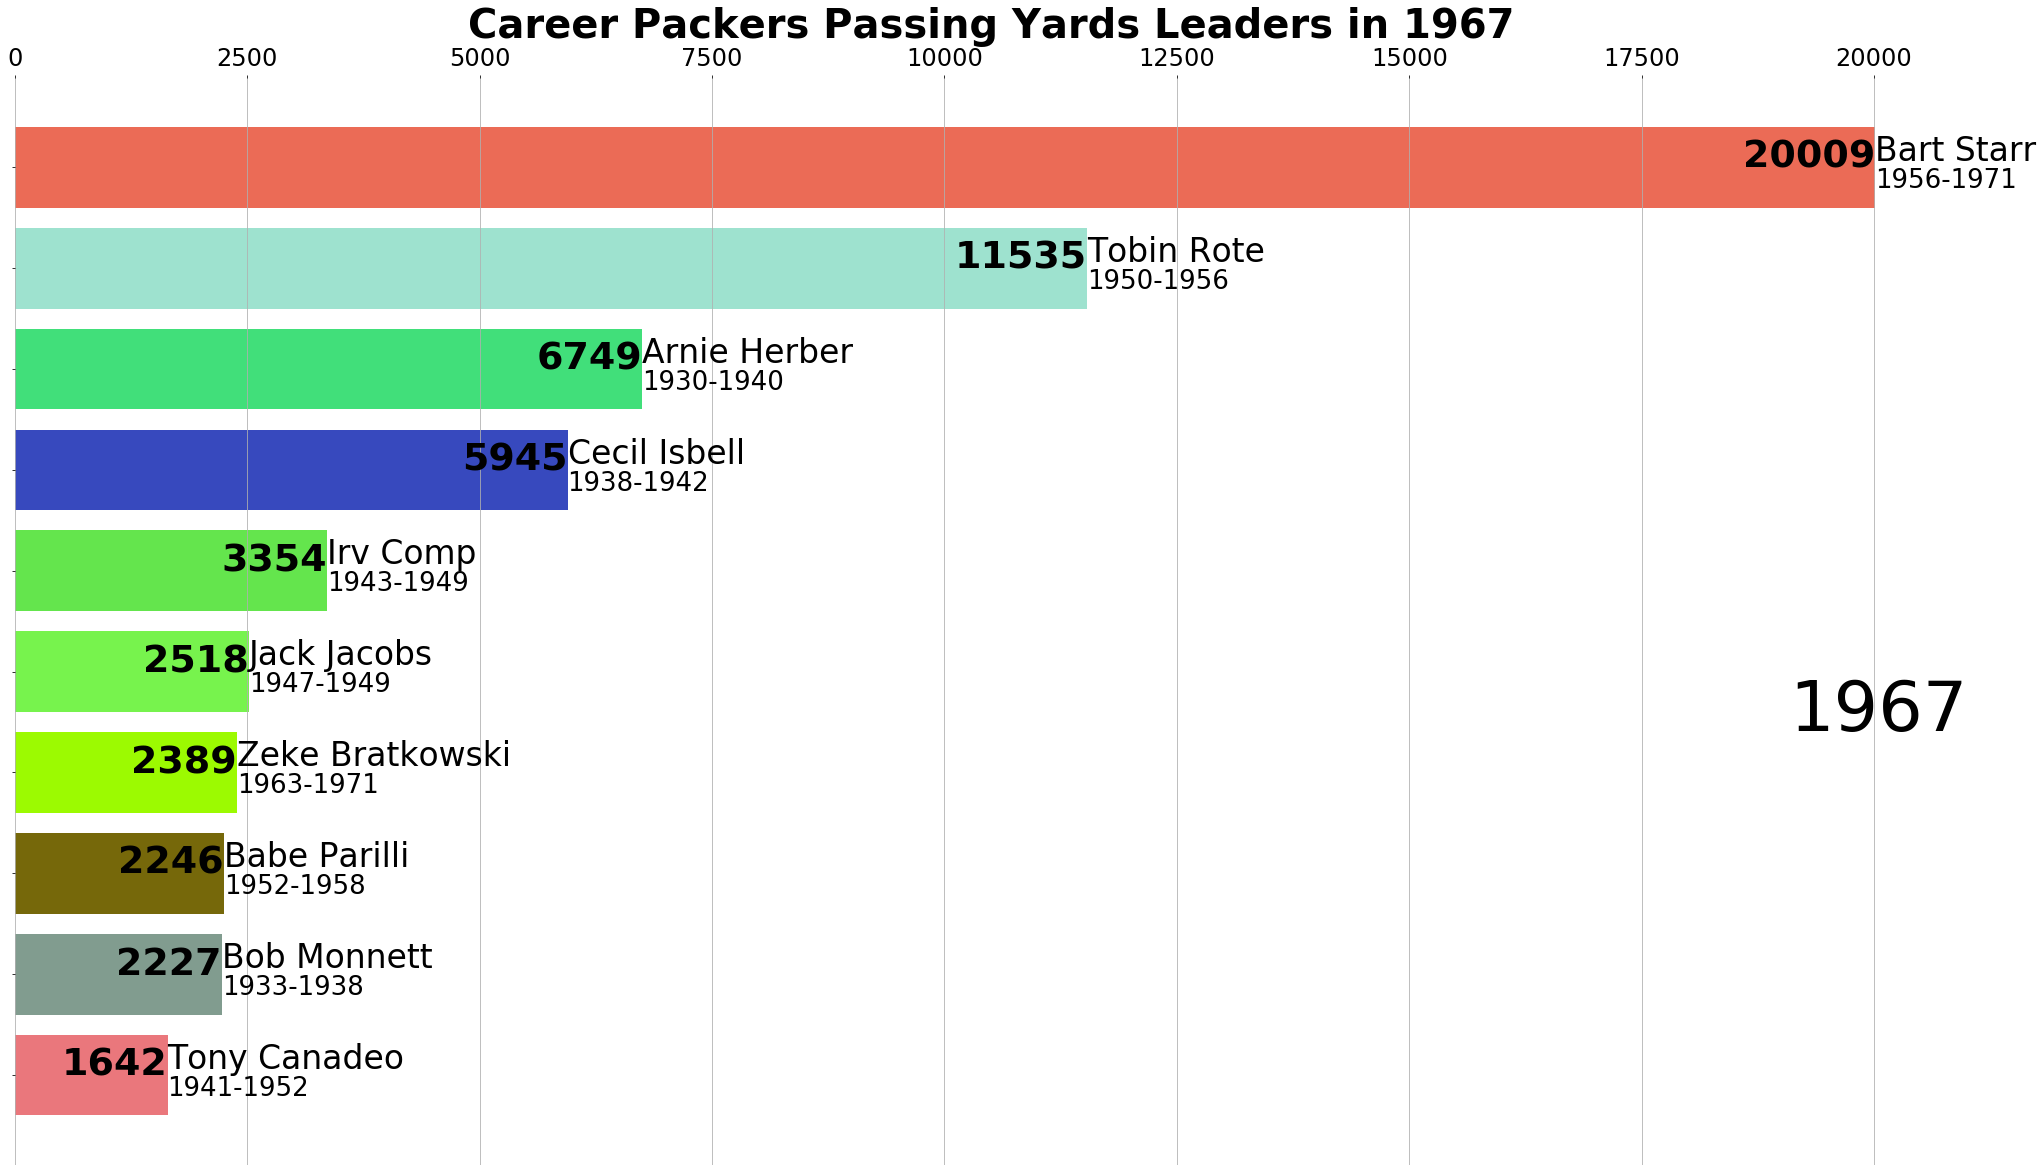

In [50]:
#Code to assign each player a different color and keep them consistent if the years are changed
def transform_color(color, amount = 0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = passing_yds['Player'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]

#Create figure and call the draw_barchart function
fig, ax = plt.subplots(figsize=(35, 20))
def draw_barchart(year):
    passing_yds_year=passing_yds[passing_yds['Year'].eq(year)]
    passing_yds_year = passing_yds_year[::-1]
    ax.clear()
    
    bar_colors = dict(zip(passing_yds['Player'].unique(), rgb_colors))
    
    ax.barh(passing_yds_year['Player'], passing_yds_year['Passing Yards'], color = [bar_colors[i] for i in passing_yds_year['Player']])
    #loop to put text of yards after bar and player/years played inside bar
    for i, (total, Player,YearsPlayed) in enumerate(zip(passing_yds_year['Passing Yards'], passing_yds_year['Player'], passing_yds_year['Years Played'])):
        ax.text(total, i,   total, ha='right', color = 'black', weight = 600,  size = 38)
        ax.text(total, i,   Player, ha='left', color = 'black', size = 33, va='bottom')
        ax.text(total, i,   YearsPlayed, ha='left', color = 'black', size = 26, va='top')
    #Putting a bigger year label on the right of graph to make it more obvious what year the data is showing
    ax.text(1, 0.4, year, transform=ax.transAxes, size=70, ha='right')
    
    ax.xaxis.set_ticks_position('top')
    
    plt.tick_params(labelsize = 24)
    
    ax.set_title('Career Packers Passing Yards Leaders in' + ' ' + str(year), size = 40, weight=600)
    plt.box(False)
    ax.set_yticklabels([])
    ax.grid(which='major', axis='x', linestyle='-')
    
#calling function with the year 1967   
draw_barchart(1967)   

In [33]:
#Code to run for animation launch and control - Replacing with a recorded animated gif for ease of visualizing in notebook and notebook file size


#fig, ax = plt.subplots(figsize=(35, 25)) 
#using animation library to call function at regular intervals (speed) controlled by interval amount and selected range(years)
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1934, 2020), interval = 1200)
#show a playble chart
#HTML(animator.to_jshtml()) 

<img src="Packers_Top_Passing_Yds_By_Year.gif" align='left' width="900"  height="600" />